In [66]:
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [10]:
students_df = pd.read_csv("StudentsPerformance.csv")
students_df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [24]:
molten_students = pd.melt(df, id_vars=['gender','race/ethnicity','parental level of education',
                                       'lunch','test preparation course'],
                          value_vars=['math score','reading score','writing score'])
molten_students

,gender,race/ethnicity,parental level of education,lunch,test preparation course,variable,value
0,female,group B,bachelor's degree,standard,none,math score,72
1,female,group C,some college,standard,completed,math score,69
2,female,group B,master's degree,standard,none,math score,90
3,male,group A,associate's degree,free/reduced,none,math score,47
4,male,group C,some college,standard,none,math score,76
...,...,...,...,...,...,...,...
2995,female,group E,master's degree,standard,completed,writing score,95
2996,male,group C,high school,free/reduced,none,writing score,55
2997,female,group C,high school,free/reduced,completed,writing score,65
2998,female,group D,some college,standard,completed,writing score,77


## Exploring the data

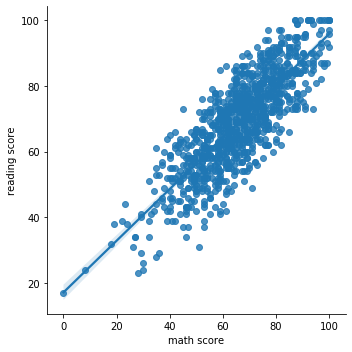

In [9]:
sns.lmplot(x="math score", y="reading score", data=students_df)

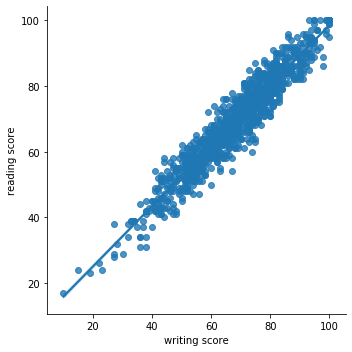

In [11]:
sns.lmplot(x="writing score", y="reading score", data=students_df)

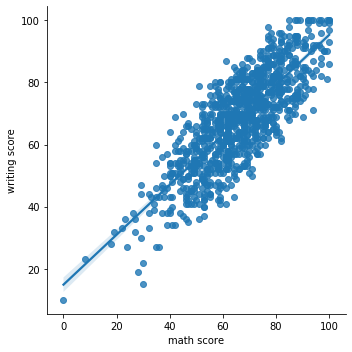

In [12]:
sns.lmplot(x="math score", y="writing score", data=students_df)

## Exploting data distribution

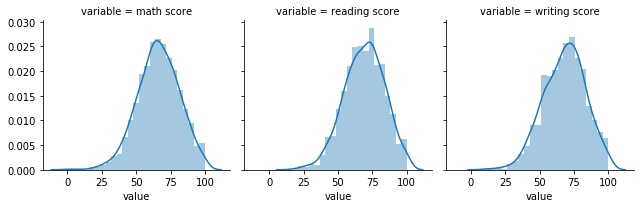

In [30]:
g = sns.FacetGrid(molten_students, col="variable")
g.map(sns.distplot, "value")

### Looks close to normal, but not quite, let's check

In [17]:
stats.normaltest(students_df["math score"])

NormaltestResult(statistic=15.408960513931822, pvalue=0.00045080293869937836)

In [18]:
stats.normaltest(students_df["writing score"])

NormaltestResult(statistic=13.606450837263859, pvalue=0.0011101885439899974)

In [31]:
stats.normaltest(students_df["reading score"])

NormaltestResult(statistic=13.606450837263859, pvalue=0.0011101885439899974)

#### p-values are < 0.05, so data is **not** normaly distributed

## Using Pearson corellation

In [40]:
students_df.corr(method='pearson')

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


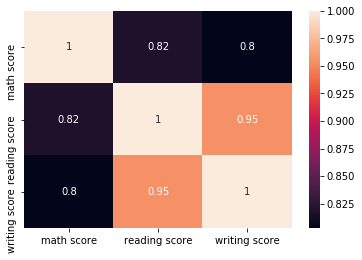

In [41]:
sns.heatmap(students_df.corr(method='pearson'), annot=True)

# Exploring connection between lunches and parent's education / race

In [47]:
students_df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


Relative frequency of having free/reduced lunch in race group A
0.125
Relative frequency of having free/reduced lunch in race group D
0.125
Relative frequency of having free/reduced lunch in race group C
0.125
Relative frequency of having free/reduced lunch in race group B
0.125
Relative frequency of having free/reduced lunch in race group E
0.125


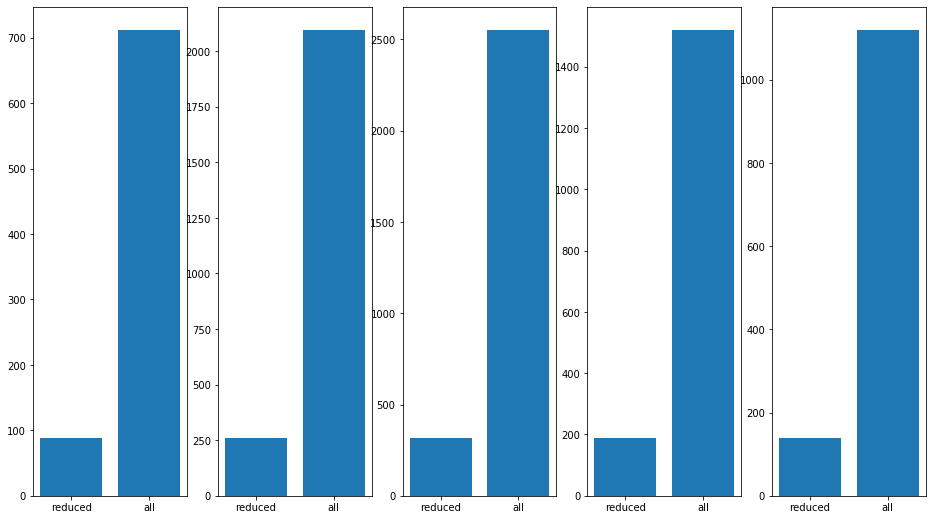

In [82]:
fig=plt.figure(figsize=(16,9))
columns = 5
rows = 1


for num, group in enumerate(set(students_df["race/ethnicity"])):
    df = students_df.groupby(['race/ethnicity']).get_group(group)
    print(f"Relative frequency of having free/reduced lunch in race {group}")
    print(len(df["lunch"] == "free/reduced") / df.size)
    fig.add_subplot(rows, columns, num+1)
    plt.bar(["reduced", "all"], [len(df["lunch"] == "free/reduced"), df.size])

Relative frequency of having free/reduced lunch with parents with some college
0.125
Relative frequency of having free/reduced lunch with parents with bachelor's degree
0.125
Relative frequency of having free/reduced lunch with parents with high school
0.125
Relative frequency of having free/reduced lunch with parents with associate's degree
0.125
Relative frequency of having free/reduced lunch with parents with some high school
0.125
Relative frequency of having free/reduced lunch with parents with master's degree
0.125


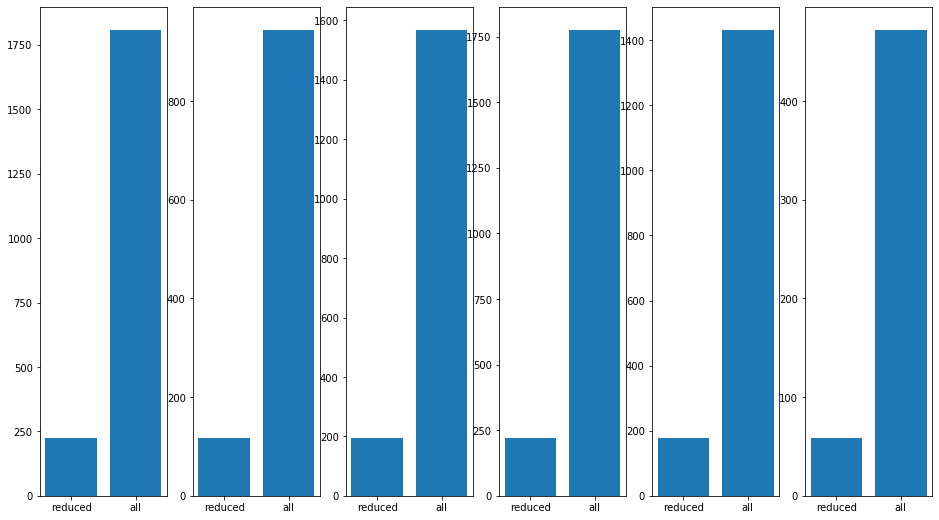

In [83]:
fig=plt.figure(figsize=(16,9))
columns = 6
rows = 1


for num, group in enumerate(set(students_df["parental level of education"])):
    df = students_df.groupby(['parental level of education']).get_group(group)
    print(f"Relative frequency of having free/reduced lunch with parents with {group}")
    print(len(df["lunch"] == "free/reduced") / df.size)
    fig.add_subplot(rows, columns, num+1)
    plt.bar(["reduced", "all"], [len(df["lunch"] == "free/reduced"), df.size])

# No connection between race, education and lunch